<a href="https://colab.research.google.com/github/jeggs2003/LAB4/blob/main/PrediccionCultivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

In [30]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[3])
oculta2 = tf.keras.layers.Dense(units=3)
oculta3 = tf.keras.layers.Dense(units=3)
oculta4 = tf.keras.layers.Dense(units=3)
oculta5 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, oculta3, oculta4, oculta5, salida])

In [31]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [32]:
Humedad = np.array([5, 3, 8, 6, 1, 9, 2], dtype=float)
Plagas = np.array([0, 2, 2, 1, 3, 2, 4], dtype=float)
LuzSolar = np.array([8, 9, 7, 7, 8, 6, 3], dtype=float)
Productividad = np.array([8.3, 5.2, 6.8, 7, 3.2, 9.5, 1.3], dtype=float)

X = np.column_stack((Humedad, Plagas, LuzSolar))

In [36]:
print("Comenzando entrenamiento...")
# Se debe pasar X y Productividad como argumentos en la función fit()
historial = modelo.fit(X, Productividad, epochs=10000, batch_size=1, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


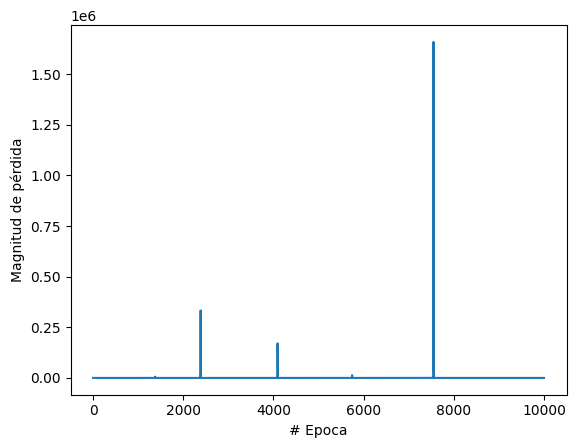

In [37]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [49]:
print("Hagamos una predicción!")
# Combinamos las variables independientes en un solo array y lo pasamos a la función predict
nueva_entrada = np.array([[7, 0, 9]], dtype=float)
resultado = modelo.predict(nueva_entrada)
print("El resultado es " + str(resultado[0][0]) + " productividad!")

Hagamos una predicción!
1/1 [==============================] - 0s 43ms/step
El resultado es 8.971895 productividad!


In [48]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(oculta3.get_weights())
print(oculta4.get_weights())
print(oculta5.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.46661305, -0.6221199 ,  2.732904  ],
       [-4.5438943 ,  0.3153166 , -3.4479866 ],
       [-3.5604744 , -1.9924455 ,  0.6157306 ]], dtype=float32), array([ 0.3573645, -5.873467 , -0.4281925], dtype=float32)]
[array([[ 0.77349466, -0.68685806, -1.7834849 ],
       [-1.2674872 ,  0.61002725,  2.2354615 ],
       [ 0.50961816,  0.9549642 , -0.24250478]], dtype=float32), array([ 5.8503838, -4.3446674,  5.565836 ], dtype=float32)]
[array([[-1.3112208 , -0.09513271, -0.20067707],
       [ 0.7338445 , -0.37976035,  0.74154913],
       [ 0.08838366, -0.07110967, -0.5247256 ]], dtype=float32), array([ 2.206511  ,  7.401394  , -0.45019946], dtype=float32)]
[array([[ 0.1236582 ,  0.0540424 ,  0.4089819 ],
       [-1.0066278 , -0.73746145, -0.22501701],
       [ 1.8972294 ,  1.382538  ,  0.918982  ]], dtype=float32), array([1.1819149, 2.3771167, 3.8582957], dtype=float32)]
[array([[-0.11921605,  1.1613288 ,  0.5454774 ],
       [-0.73676807, -0.55555683,